<a href="https://colab.research.google.com/github/RishabhJain-28/Capital-Asset-Pricing-Model/blob/master/Capital_Asset_Pricing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import pandas_datareader.data as wb
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import numpy as np
from google.colab import files
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

**Importing Companies data**


In [4]:
tickers = ['GS','HDFCBANK.NS','DMLRY','RELIANCE.NS','AMZN','^GSPC']

In [5]:
!pip install --upgrade pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
stocks_df = pd.DataFrame()

for t in tickers:
      stocks_df[t] = wb.DataReader(t,data_source='yahoo',start=dt.date(2020,1,6))['Close']

In [7]:
stocks_df

,GS,HDFCBANK.NS,DMLRY,RELIANCE.NS,AMZN,^GSPC
Date,,,,,,
2020-01-06,233.949997,1240.949951,13.66,1487.400879,95.143997,3246.280029
2020-01-07,235.490005,1260.599976,13.65,1510.284058,95.343002,3237.179932
2020-01-08,237.759995,1257.300049,13.74,1498.941528,94.598503,3253.050049
2020-01-09,242.600006,1271.400024,13.79,1533.464233,95.052498,3274.699951
2020-01-10,242.110001,1282.699951,13.66,1533.117554,94.157997,3265.350098
...,...,...,...,...,...,...
2022-08-31,332.670013,NaN,14.04,NaN,126.769997,3955.000000
2022-09-01,333.500000,1472.150024,13.78,2560.399902,127.820000,3966.850098
2022-09-02,331.480011,1485.500000,13.83,2530.500000,127.510002,3924.260010


In [8]:
stocks_df.index

DatetimeIndex(['2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17',
               ...
               '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-29',
               '2022-08-30', '2022-08-31', '2022-09-01', '2022-09-02',
               '2022-09-06', '2022-09-07'],
              dtype='datetime64[ns]', name='Date', length=674, freq=None)

**NORMALIZING DATA**

In [9]:

norm_stocks_df = (stocks_df/stocks_df.iloc[0])
norm_stocks_df

,GS,HDFCBANK.NS,DMLRY,RELIANCE.NS,AMZN,^GSPC
Date,,,,,,
2020-01-06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-07,1.006583,1.015835,0.999268,1.015385,1.002092,0.997197
2020-01-08,1.016286,1.013175,1.005857,1.007759,0.994267,1.002085
2020-01-09,1.036974,1.024538,1.009517,1.030969,0.999038,1.008755
2020-01-10,1.034879,1.033644,1.000000,1.030736,0.989637,1.005874
...,...,...,...,...,...,...
2022-08-31,1.421971,NaN,1.027818,NaN,1.332401,1.218318
2022-09-01,1.425518,1.186309,1.008785,1.721392,1.343437,1.221968
2022-09-02,1.416884,1.197067,1.012445,1.701290,1.340179,1.208848


In [10]:
fig = px.line(title = "Normalized stock prices")

for stock in norm_stocks_df.columns[1:]:
    fig.add_scatter(x = norm_stocks_df.index, y = norm_stocks_df[stock], name = stock)
fig.show()

**Daily Return Calculations**

In [11]:
def daily_return_estimator(df):
  df_daily_return=df.copy()

  for i in df.columns:
    for j in range(1,len(df)):
      df_daily_return[i][j]=((df[i][j]-df[i][j-1])/df[i][j-1])*100
    df_daily_return.iloc[0] = 0
  return df_daily_return

In [12]:
stocks_daily_return = daily_return_estimator(stocks_df)
stocks_daily_return

,GS,HDFCBANK.NS,DMLRY,RELIANCE.NS,AMZN,^GSPC
Date,,,,,,
2020-01-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-07,0.658264,1.583466,-0.073208,1.538467,0.209162,-0.280324
2020-01-08,0.963943,-0.261774,0.659342,-0.751020,-0.780864,0.490245
2020-01-09,2.035671,1.121449,0.363902,2.303139,0.479917,0.665526
2020-01-10,-0.201981,0.888778,-0.942713,-0.022608,-0.941060,-0.285518
...,...,...,...,...,...,...
2022-08-31,-0.287741,NaN,-0.636944,NaN,-1.522566,-0.781703
2022-09-01,0.249492,NaN,-1.851853,NaN,0.828274,0.299623
2022-09-02,-0.605694,0.906835,0.362846,-1.167783,-0.242527,-1.073650


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



Text(0.5, 1.0, 'Daily returns of the stocks')

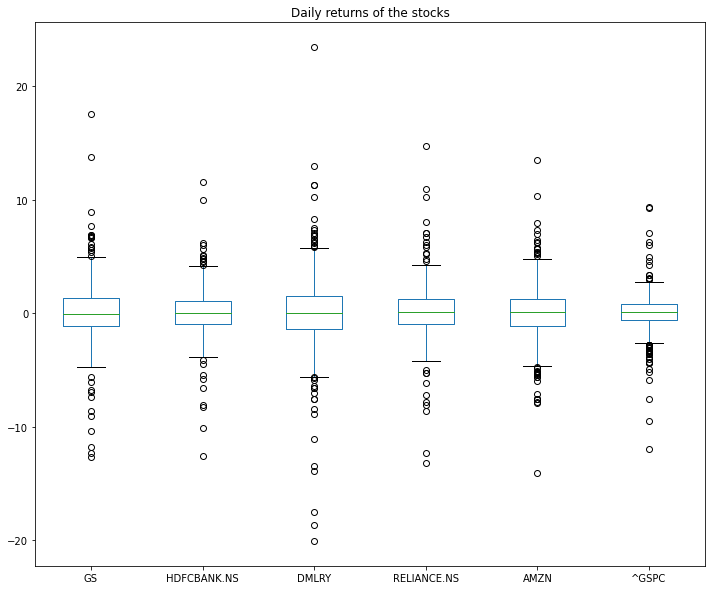

In [13]:
stocks_daily_return.boxplot(figsize=(12, 10), grid=False)
plt.title("Daily returns of the stocks")

# **APPLYING CAPM MODEL**

FINDING BETA VALUE

In [14]:
stocks_daily_return.fillna(0)

,GS,HDFCBANK.NS,DMLRY,RELIANCE.NS,AMZN,^GSPC
Date,,,,,,
2020-01-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-07,0.658264,1.583466,-0.073208,1.538467,0.209162,-0.280324
2020-01-08,0.963943,-0.261774,0.659342,-0.751020,-0.780864,0.490245
2020-01-09,2.035671,1.121449,0.363902,2.303139,0.479917,0.665526
2020-01-10,-0.201981,0.888778,-0.942713,-0.022608,-0.941060,-0.285518
...,...,...,...,...,...,...
2022-08-31,-0.287741,0.000000,-0.636944,0.000000,-1.522566,-0.781703
2022-09-01,0.249492,0.000000,-1.851853,0.000000,0.828274,0.299623
2022-09-02,-0.605694,0.906835,0.362846,-1.167783,-0.242527,-1.073650


In [15]:
display(stocks_daily_return['HDFCBANK.NS'].to_string())

'Date\n2020-01-06     0.000000\n2020-01-07     1.583466\n2020-01-08    -0.261774\n2020-01-09     1.121449\n2020-01-10     0.888778\n2020-01-13     0.257274\n2020-01-14     0.272162\n2020-01-15    -0.407135\n2020-01-16     0.264748\n2020-01-17    -0.737778\n2020-01-21    -2.644451\n2020-01-22    -0.281271\n2020-01-23     0.322360\n2020-01-24    -0.024093\n2020-01-27    -2.518991\n2020-01-28     0.824266\n2020-01-29     1.034175\n2020-01-30    -0.792971\n2020-01-31     0.020391\n2020-02-03    -2.731795\n2020-02-04     3.101945\n2020-02-05     1.207511\n2020-02-06    -0.389666\n2020-02-07     0.193572\n2020-02-10    -0.152947\n2020-02-11     0.024182\n2020-02-12     0.677094\n2020-02-13    -0.608485\n2020-02-14    -1.776224\n2020-02-18    -0.500265\n2020-02-19     1.149800\n2020-02-20    -0.823010\n2020-02-21          NaN\n2020-02-24          NaN\n2020-02-25    -0.797546\n2020-02-26    -0.087482\n2020-02-27     0.016673\n2020-02-28    -1.817494\n2020-03-02     0.165580\n2020-03-03     0.1

In [16]:
stocks_daily_return

,GS,HDFCBANK.NS,DMLRY,RELIANCE.NS,AMZN,^GSPC
Date,,,,,,
2020-01-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-07,0.658264,1.583466,-0.073208,1.538467,0.209162,-0.280324
2020-01-08,0.963943,-0.261774,0.659342,-0.751020,-0.780864,0.490245
2020-01-09,2.035671,1.121449,0.363902,2.303139,0.479917,0.665526
2020-01-10,-0.201981,0.888778,-0.942713,-0.022608,-0.941060,-0.285518
...,...,...,...,...,...,...
2022-08-31,-0.287741,NaN,-0.636944,NaN,-1.522566,-0.781703
2022-09-01,0.249492,NaN,-1.851853,NaN,0.828274,0.299623
2022-09-02,-0.605694,0.906835,0.362846,-1.167783,-0.242527,-1.073650


In [17]:
import math
for key, value in enumerate(stocks_daily_return['HDFCBANK.NS']):
  if math.isnan(value):
    stocks_daily_return['HDFCBANK.NS'][key] = 0

for key, value in enumerate(stocks_daily_return['RELIANCE.NS']):
  if math.isnan(value):
    stocks_daily_return['RELIANCE.NS'][key] = 0
    

In [18]:
stocks_daily_return['HDFCBANK.NS'][3]

1.1214487424127182

Text(0.5, 0.98, 'Beta estimation: regression between SP500 and individual stock daily performance')

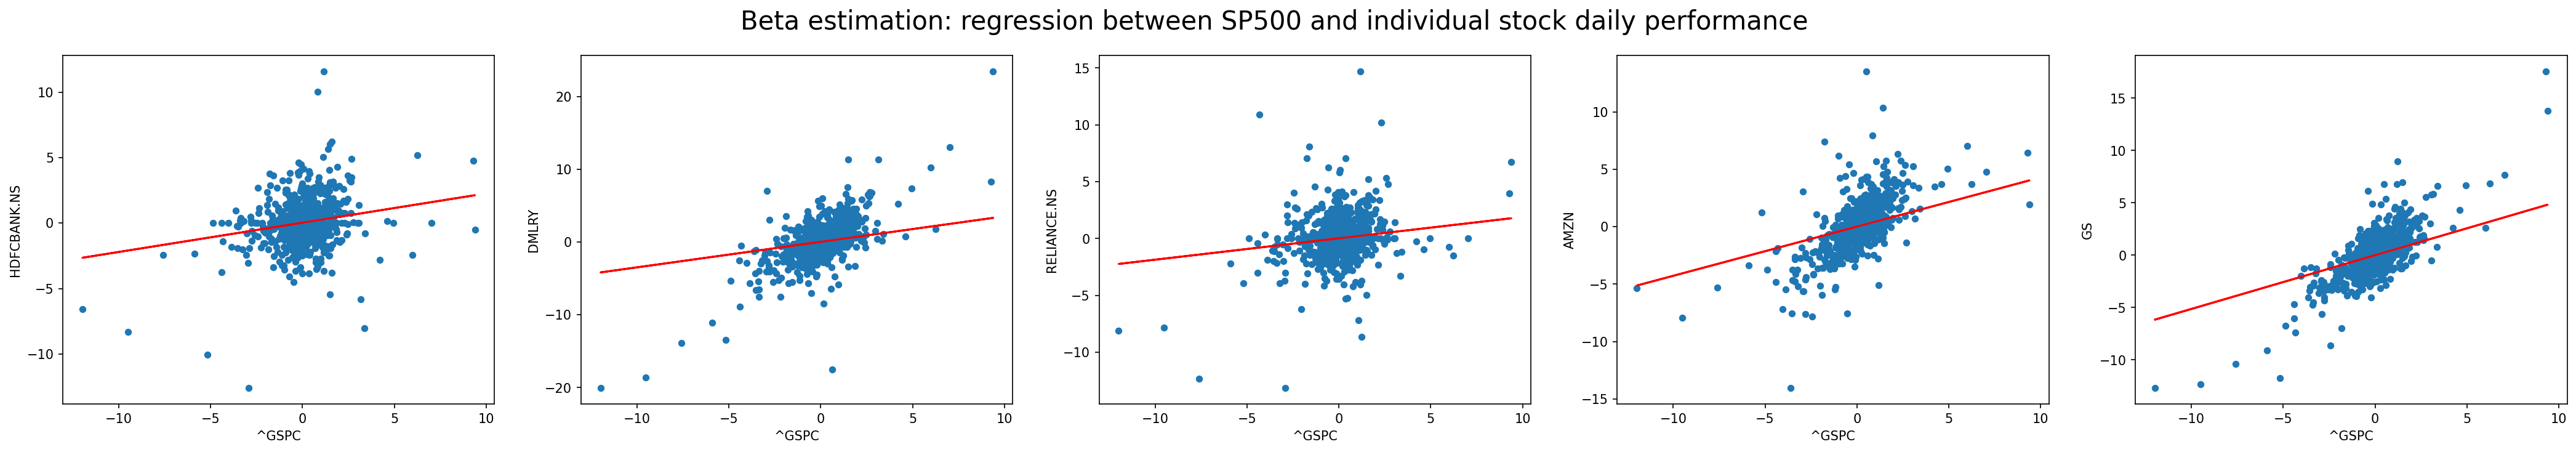

In [19]:
# Initialize empty dictionaries to save results
beta,alpha = dict(), dict()
# Make a nice subplot
fig, axes = plt.subplots(1,5, dpi=150, figsize=(35,5))
axes = axes.flatten()

for idx, stock in enumerate(stocks_daily_return.columns):
  if stock!="^GSPC":
    stocks_daily_return.plot(kind = "scatter", x = "^GSPC", y = stock, ax=axes[idx-1])
    b_, a_ = np.polyfit(stocks_daily_return[stock], stocks_daily_return["^GSPC"], 1)
 
    regression_line = b_ * stocks_daily_return["^GSPC"] + a_
    axes[idx-1].plot(stocks_daily_return["^GSPC"], regression_line, "-", color = "r")
    
    beta[stock] = b_
    alpha[stock] = a_
plt.suptitle("Beta estimation: regression between SP500 and individual stock daily performance", size=20)

In [20]:
ER = dict()
rf = 0 
rm = stocks_daily_return["^GSPC"].mean() * 252

In [21]:
keys = list(beta.keys())
for k in keys:
    # Calculate return for every security using CAPM 
    ER[k] = rf + beta[k] * (rm-rf)

for k in keys:
    print("Expected return based on CAPM model for {} is {}%".format(k, ER[k]))

Expected return based on CAPM model for GS is 5.597032031016183%
Expected return based on CAPM model for HDFCBANK.NS is 2.4349626611642265%
Expected return based on CAPM model for DMLRY is 3.8189197609722787%
Expected return based on CAPM model for RELIANCE.NS is 2.046869170920281%
Expected return based on CAPM model for AMZN is 4.6647905642343%


In [22]:
for k in keys:
    print('Return based on historical data for {} is {}%'.format(k, stocks_daily_return[k].mean() * 252))

Return based on historical data for GS is 20.367284948448%
Return based on historical data for HDFCBANK.NS is 15.551860142024529%
Return based on historical data for DMLRY is 13.508405309543338%
Return based on historical data for RELIANCE.NS is 28.573260893188955%
Return based on historical data for AMZN is 18.701974859082853%
